In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data in 
df = pd.read_csv('trees.csv')

/var/folders/7q/gj7yd_s57z9bgskyy_d1112c0000gn/T/ipykernel_9745/168075846.py:2: DtypeWarning: Columns (7,8,9,11,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('trees.csv')


In [3]:
# What does the data look like?
print("Data overview:")
print(df.head())  
print(df.info()) 

Data overview:
   objectid               borough                             maintainer  \
0         1  Kingston upon Thames  Royal Borough of Kingston upon Thames   
1         2  Kingston upon Thames  Royal Borough of Kingston upon Thames   
2         3  Kingston upon Thames  Royal Borough of Kingston upon Thames   
3         4  Kingston upon Thames  Royal Borough of Kingston upon Thames   
4         5  Kingston upon Thames  Royal Borough of Kingston upon Thames   

  gla_tree_name tree_name     taxon_name common_name  age  \
0         Other       NaN  Abies grandis   Grand fir  NaN   
1         Other       NaN  Abies grandis   Grand fir  NaN   
2         Other       NaN  Abies grandis   Grand fir  NaN   
3         Other       NaN  Abies grandis   Grand fir  NaN   
4         Other       NaN  Abies grandis   Grand fir  NaN   

              age_group   height_m  spread_m canopy_spread_group  \
0  Early mature (16-30)  10 to 15m       NaN           00 to 05m   
1  Early mature (16-30)  

In [4]:
# Columns like 'height_m', 'spread_m', 'diameter_at_breast_height_cm' might need conversion to numeric

df_cleaned = df.copy()

# Convert columns to numeric, coercing errors to NaN for any non-convertible values
df_cleaned['height_m'] = pd.to_numeric(df_cleaned['height_m'], errors = 'coerce')
df_cleaned['spread_m'] = pd.to_numeric(df_cleaned['spread_m'], errors = 'coerce')
df_cleaned['diameter_at_breast_height_cm'] = pd.to_numeric(df_cleaned['diameter_at_breast_height_cm'], errors = 'coerce')

# Checking missing values in the dataset
print("\nMissing data in the dataset:")
print(df_cleaned.isnull().sum())

# We can see there are lots of missing values in columns like 'tree_name', 'height_m', etc.
# Ideally we'd drop these now


Missing data in the dataset:
objectid                             0
borough                              0
maintainer                           0
gla_tree_name                        0
tree_name                         1234
taxon_name                       51043
common_name                     134919
age                             605989
age_group                       587814
height_m                        732107
spread_m                        716742
canopy_spread_group             798975
diameter_at_breast_height_cm    608998
dbh_group                       798975
longitude                            0
latitude                             0
condition                       798975
load_date                            0
updated                              0
dtype: int64


In [ ]:
# The aim with the next section is to figure out how to best complete the data - as much as possible. Find a reasonable way to fill in missing values that could be handy. 

#  Let's start with cleaning the height_m column, so I've decided to keep them all as floats for consistency and change all the range's into their average 

# Function to clean height_m, take mid-point of ranges and convert single values to float
def clean_height(value):
    if isinstance(value, str):
        # If the value is in a range format like '10 to 15m', take the average
        match = re.findall(r'(\d+)', value)
        if len(match) == 2:
            return (float(match[0]) + float(match[1])) / 2  # Midpoint of the range
        elif len(match) == 1:
            return float(match[0])  # Single number
        else:
            return None
    return value

# Apply the function to 'height_m' and convert to numeric, leaving NaNs as they are
df['height_m'] = df['height_m'].apply(clean_height)
df['height_m'] = pd.to_numeric(df['height_m'], errors='coerce')

/var/folders/7q/gj7yd_s57z9bgskyy_d1112c0000gn/T/ipykernel_9745/927785725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'condition', data = df_cleaned, palette = 'Set2')


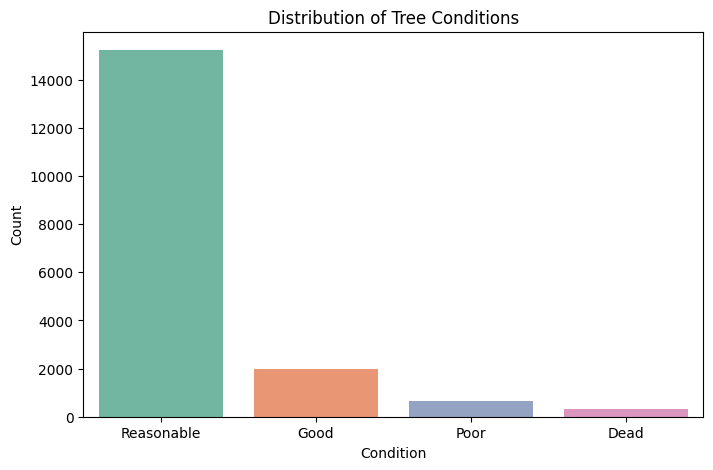

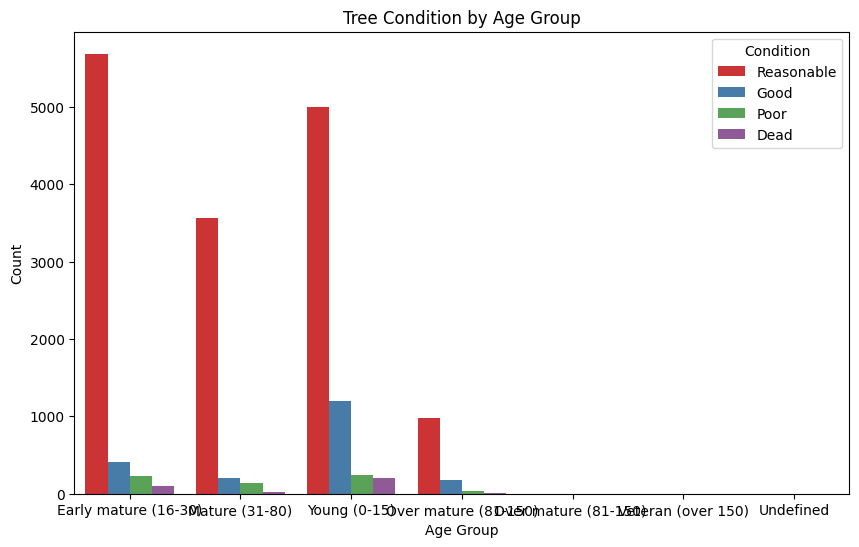

In [5]:
# Some basic visuals - these are no good so don't bother - the data has too many missing values for this to be representative at all - only one borough has "conditions" variable

# Visualizing the distribution of the 'condition' variable
plt.figure(figsize = (8, 5))
sns.countplot(x = 'condition', data = df_cleaned, palette = 'Set2')
plt.title('Distribution of Tree Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# Visualizing the tree condition by age group
plt.figure(figsize = (10, 6))
sns.countplot(x = 'age_group', hue = 'condition', data = df_cleaned, palette = 'Set1')
plt.title('Tree Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title = 'Condition')
plt.show()